In [1]:
plt.style.use('bmh')

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.tail()

App             Category  \
10836                               Sya9a Maroc - FR               FAMILY   
10837               Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                         Parkinson Exercices FR              MEDICAL   
10839                  The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840  iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating             Genres      Last Updated         Current Ver  \
10836       Everyone          Education     July 25, 2017                1.48   
10837       Everyone          Education      July 6, 2018                 1.0   
10838       Everyone            Medical  January 20, 2017                 1.0   
10839     Mature 17+  Books & Reference  January 19, 2015  Varies with device   
10840       Everyone          Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
10836          4.1 and up  
10837          4.1 and up  
10838          2.2 and up  
10839  Varies with device  
10840  Varies with device

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

In [5]:
# 빈 데이터 확인을 위한 시각화
import missingno as msno

msno.matrix(df)

In [6]:
msno.bar(df)

In [7]:
# 비어있는 데이터 개수 - Size
len(df[df["Size"].isnull()])

0

In [8]:
# 비어있는 데이터 개수 - Installs
len(df[df["Installs"].isnull()])

0

In [9]:
# 비어있는 데이터 개수 - Type
len(df[df["Type"].isnull()])

1

In [10]:
# 작업할 column들 선별 후, df_1 저장
columns=["Size", "Installs", "Type"]
df_1 = df[columns]
df_1.tail(5)

Size     Installs  Type
10836                 53M       5,000+  Free
10837                3.6M         100+  Free
10838                9.5M       1,000+  Free
10839  Varies with device       1,000+  Free
10840                 19M  10,000,000+  Free

In [11]:
# Object 데이터 타입 string으로 변환
df_1["Size"] = (df_1["Size"]).astype("string")
df_1["Installs"] = (df_1["Installs"]).astype("string")
df_1["Type"] = (df_1["Type"]).astype("string")

# 추가 작업을 위해 df_2에 복사 - checkpoint 생성
df_2 = df_1

C:\Users\Gk\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gk\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gk\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [12]:
# object -> string 변환 여부 확인
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Size      10841 non-null  string
 1   Installs  10841 non-null  string
 2   Type      10840 non-null  string
dtypes: string(3)
memory usage: 254.2 KB


In [13]:
# Size 데이터 마지막 character 제거 
df_2["Size"] = df_2["Size"].str[:-1]
df_2

C:\Users\Gk\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Size     Installs  Type
0                     19      10,000+  Free
1                     14     500,000+  Free
2                    8.7   5,000,000+  Free
3                     25  50,000,000+  Free
4                    2.8     100,000+  Free
...                  ...          ...   ...
10836                 53       5,000+  Free
10837                3.6         100+  Free
10838                9.5       1,000+  Free
10839  Varies with devic       1,000+  Free
10840                 19  10,000,000+  Free

[10841 rows x 3 columns]

In [14]:
# Installs 데이터 마지막 character 제거
df_2["Installs"] = df_2["Installs"].str[:-1]
df_2

C:\Users\Gk\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Size    Installs  Type
0                     19      10,000  Free
1                     14     500,000  Free
2                    8.7   5,000,000  Free
3                     25  50,000,000  Free
4                    2.8     100,000  Free
...                  ...         ...   ...
10836                 53       5,000  Free
10837                3.6         100  Free
10838                9.5       1,000  Free
10839  Varies with devic       1,000  Free
10840                 19  10,000,000  Free

[10841 rows x 3 columns]

In [15]:
# 데이터 전처리 1차 완료 - checkpoint 생성
df_3 = df_2
df_3

Size    Installs  Type
0                     19      10,000  Free
1                     14     500,000  Free
2                    8.7   5,000,000  Free
3                     25  50,000,000  Free
4                    2.8     100,000  Free
...                  ...         ...   ...
10836                 53       5,000  Free
10837                3.6         100  Free
10838                9.5       1,000  Free
10839  Varies with devic       1,000  Free
10840                 19  10,000,000  Free

[10841 rows x 3 columns]

In [16]:
# Installs ',' 제거 작업
df_3["Installs"] = df_3["Installs"].str.replace(',', '')
df_3

C:\Users\Gk\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Size  Installs  Type
0                     19     10000  Free
1                     14    500000  Free
2                    8.7   5000000  Free
3                     25  50000000  Free
4                    2.8    100000  Free
...                  ...       ...   ...
10836                 53      5000  Free
10837                3.6       100  Free
10838                9.5      1000  Free
10839  Varies with devic      1000  Free
10840                 19  10000000  Free

[10841 rows x 3 columns]

In [17]:
# checkpoint
df_4 = df_3
df_4

Size  Installs  Type
0                     19     10000  Free
1                     14    500000  Free
2                    8.7   5000000  Free
3                     25  50000000  Free
4                    2.8    100000  Free
...                  ...       ...   ...
10836                 53      5000  Free
10837                3.6       100  Free
10838                9.5      1000  Free
10839  Varies with devic      1000  Free
10840                 19  10000000  Free

[10841 rows x 3 columns]

In [18]:
# Install column에 숫자가 아닌 데이터 확인
mask_i = pd.to_numeric(df_4["Installs"], errors='coerce').isna()
print(mask_i.sum())

2


In [19]:
df_i = df_4[mask_i]
df_i

Size Installs  Type
9148   Varies with devic           <NA>
10472              1,000      Fre     0

In [20]:
# 데이터 확인 후 10472는 데이터가 한칸씩 밀린 것을 확인, 수기로 데이터 변경
df_4.Size[10472] = '3.0'
df_4.Installs[10472] = '1000'
df_4.Type[10472] = 'Free'

C:\Users\Gk\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gk\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gk\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd fr

In [21]:
df_4.Size[10472], df_4.Installs[10472], df_4.Type[10472]

('3.0', '1000', 'Free')

In [22]:
# Install column에 있는 숫자가 아닌 데이터 NaN으로 변경
df_4["Installs"] = pd.to_numeric(df_4.Installs, errors='coerce')

mask_i2 = pd.to_numeric(df_4["Installs"], errors='coerce').isna()
print(mask_i2.sum())

C:\Users\Gk\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1


In [23]:
# NaN 변경 확인
df_i2 = df_4[mask_i2]
df_i2

Size  Installs  Type
9148  Varies with devic       NaN  <NA>

In [24]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Size      10841 non-null  string 
 1   Installs  10840 non-null  float64
 2   Type      10840 non-null  string 
dtypes: float64(1), string(2)
memory usage: 254.2 KB


In [25]:
# checkpoint
df_5 = df_4
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Size      10841 non-null  string 
 1   Installs  10840 non-null  float64
 2   Type      10840 non-null  string 
dtypes: float64(1), string(2)
memory usage: 254.2 KB


In [26]:
df_5

Size    Installs  Type
0                     19     10000.0  Free
1                     14    500000.0  Free
2                    8.7   5000000.0  Free
3                     25  50000000.0  Free
4                    2.8    100000.0  Free
...                  ...         ...   ...
10836                 53      5000.0  Free
10837                3.6       100.0  Free
10838                9.5      1000.0  Free
10839  Varies with devic      1000.0  Free
10840                 19  10000000.0  Free

[10841 rows x 3 columns]

In [27]:
# 10841 data 중 Free의 개수
df_5.loc[df_5["Type"] == "Free"]

Size    Installs  Type
0                     19     10000.0  Free
1                     14    500000.0  Free
2                    8.7   5000000.0  Free
3                     25  50000000.0  Free
4                    2.8    100000.0  Free
...                  ...         ...   ...
10836                 53      5000.0  Free
10837                3.6       100.0  Free
10838                9.5      1000.0  Free
10839  Varies with devic      1000.0  Free
10840                 19  10000000.0  Free

[10040 rows x 3 columns]

In [28]:
# 10841 data 중 Free가 아닌 데이터의 개수
df_5.loc[df_5["Type"] != "Free"]

Size  Installs  Type
234                  6.8  100000.0  Paid
235                   39  100000.0  Paid
290                  6.8  100000.0  Paid
291                   39  100000.0  Paid
427    Varies with devic  100000.0  Paid
...                  ...       ...   ...
10735                157     100.0  Paid
10760                2.4    1000.0  Paid
10782                 11   10000.0  Paid
10785                9.5   10000.0  Paid
10798               1020      50.0  Paid

[800 rows x 3 columns]

In [29]:
df_5.loc[df_5["Type"] == "Paid"]

Size  Installs  Type
234                  6.8  100000.0  Paid
235                   39  100000.0  Paid
290                  6.8  100000.0  Paid
291                   39  100000.0  Paid
427    Varies with devic  100000.0  Paid
...                  ...       ...   ...
10735                157     100.0  Paid
10760                2.4    1000.0  Paid
10782                 11   10000.0  Paid
10785                9.5   10000.0  Paid
10798               1020      50.0  Paid

[800 rows x 3 columns]

In [30]:
# Type의 Free를 0으로 변환
df_5["Type"].replace("Free", "0", inplace=True)
df_5

C:\Users\Gk\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Size    Installs Type
0                     19     10000.0    0
1                     14    500000.0    0
2                    8.7   5000000.0    0
3                     25  50000000.0    0
4                    2.8    100000.0    0
...                  ...         ...  ...
10836                 53      5000.0    0
10837                3.6       100.0    0
10838                9.5      1000.0    0
10839  Varies with devic      1000.0    0
10840                 19  10000000.0    0

[10841 rows x 3 columns]

In [31]:
# Type의 Paid를 1로 변환
df_5["Type"].replace("Paid", "1", inplace=True)
df_5

C:\Users\Gk\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Size    Installs Type
0                     19     10000.0    0
1                     14    500000.0    0
2                    8.7   5000000.0    0
3                     25  50000000.0    0
4                    2.8    100000.0    0
...                  ...         ...  ...
10836                 53      5000.0    0
10837                3.6       100.0    0
10838                9.5      1000.0    0
10839  Varies with devic      1000.0    0
10840                 19  10000000.0    0

[10841 rows x 3 columns]

In [32]:
# Type column에 숫자가 아닌 데이터 확인
mask_t = pd.to_numeric(df_5["Type"], errors='coerce').isna()
print(mask_t.sum())

1


In [33]:
df_t = df_5[mask_t]
df_t

Size  Installs  Type
9148  Varies with devic       NaN  <NA>

In [34]:
# Install column에 있는 숫자가 아닌 데이터 NaN으로 변경
df_5["Type"] = pd.to_numeric(df_5.Type, errors='coerce')

mask_t2 = pd.to_numeric(df_5["Type"], errors='coerce').isna()
print(mask_t2.sum())

1


C:\Users\Gk\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
df_t2 = df_5[mask_t2]
df_t2

Size  Installs  Type
9148  Varies with devic       NaN   NaN

In [36]:
# csv 확인 결과, price = 0 -> Type 직접 Free인 0으로 변경

In [37]:
# 데이터 확인 후 10472는 데이터가 한칸씩 밀린 것을 확인, 수기로 데이터 변경
df_5.Type[9148] = "0"

C:\Users\Gk\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gk\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [38]:
# Type에 숫자로 이루어지지 않은 데이터 여부 확인
mask_t2 = pd.to_numeric(df_5["Type"], errors='coerce').isna()
print(mask_t2.sum())

0


In [39]:
# checkpoint
df_6 = df_5
df_6

Size    Installs  Type
0                     19     10000.0   0.0
1                     14    500000.0   0.0
2                    8.7   5000000.0   0.0
3                     25  50000000.0   0.0
4                    2.8    100000.0   0.0
...                  ...         ...   ...
10836                 53      5000.0   0.0
10837                3.6       100.0   0.0
10838                9.5      1000.0   0.0
10839  Varies with devic      1000.0   0.0
10840                 19  10000000.0   0.0

[10841 rows x 3 columns]

In [40]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Size      10841 non-null  string 
 1   Installs  10840 non-null  float64
 2   Type      10841 non-null  float64
dtypes: float64(2), string(1)
memory usage: 254.2 KB


In [41]:
# 숫자 데이터로 이루어지지 않은 데이터 개수 확인
mask_s = pd.to_numeric(df_6["Size"], errors='coerce').isna()
print(mask_s.sum())

1695


In [42]:
df_s = df_6[mask_s]
df_s

Size    Installs  Type
37     Varies with devic   5000000.0   0.0
42     Varies with devic  10000000.0   0.0
52     Varies with devic   1000000.0   0.0
67     Varies with devic   5000000.0   0.0
68     Varies with devic    100000.0   0.0
...                  ...         ...   ...
10713  Varies with devic    100000.0   0.0
10725  Varies with devic      1000.0   0.0
10765  Varies with devic    100000.0   0.0
10826  Varies with devic   5000000.0   0.0
10839  Varies with devic      1000.0   0.0

[1695 rows x 3 columns]

In [43]:
# 데이터 내용 확인 해보니 Varies with devic라는 데이터가 많음. 개수 확인
df_6.loc[df_5["Size"] == "Varies with devic"]

Size    Installs  Type
37     Varies with devic   5000000.0   0.0
42     Varies with devic  10000000.0   0.0
52     Varies with devic   1000000.0   0.0
67     Varies with devic   5000000.0   0.0
68     Varies with devic    100000.0   0.0
...                  ...         ...   ...
10713  Varies with devic    100000.0   0.0
10725  Varies with devic      1000.0   0.0
10765  Varies with devic    100000.0   0.0
10826  Varies with devic   5000000.0   0.0
10839  Varies with devic      1000.0   0.0

[1695 rows x 3 columns]

In [44]:
# Size column에 있는 데이터 모두 숫자로 변환
# 숫자가 아닌 데이터는 NaN으로 변경 
df_6["Size"] = pd.to_numeric(df_6.Size, errors='coerce')

mask_s2 = pd.to_numeric(df_6["Size"], errors='coerce').isna()
print(mask_s2.sum())

C:\Users\Gk\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1695


In [45]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Size      9146 non-null   float64
 1   Installs  10840 non-null  float64
 2   Type      10841 non-null  float64
dtypes: float64(3)
memory usage: 254.2 KB


In [46]:
#checkpoint - 전처리 2차 완료
df_7 = df_6
df_7

Size    Installs  Type
0      19.0     10000.0   0.0
1      14.0    500000.0   0.0
2       8.7   5000000.0   0.0
3      25.0  50000000.0   0.0
4       2.8    100000.0   0.0
...     ...         ...   ...
10836  53.0      5000.0   0.0
10837   3.6       100.0   0.0
10838   9.5      1000.0   0.0
10839   NaN      1000.0   0.0
10840  19.0  10000000.0   0.0

[10841 rows x 3 columns]

In [47]:
msno.matrix(df_7)

In [48]:
msno.bar(df_7)

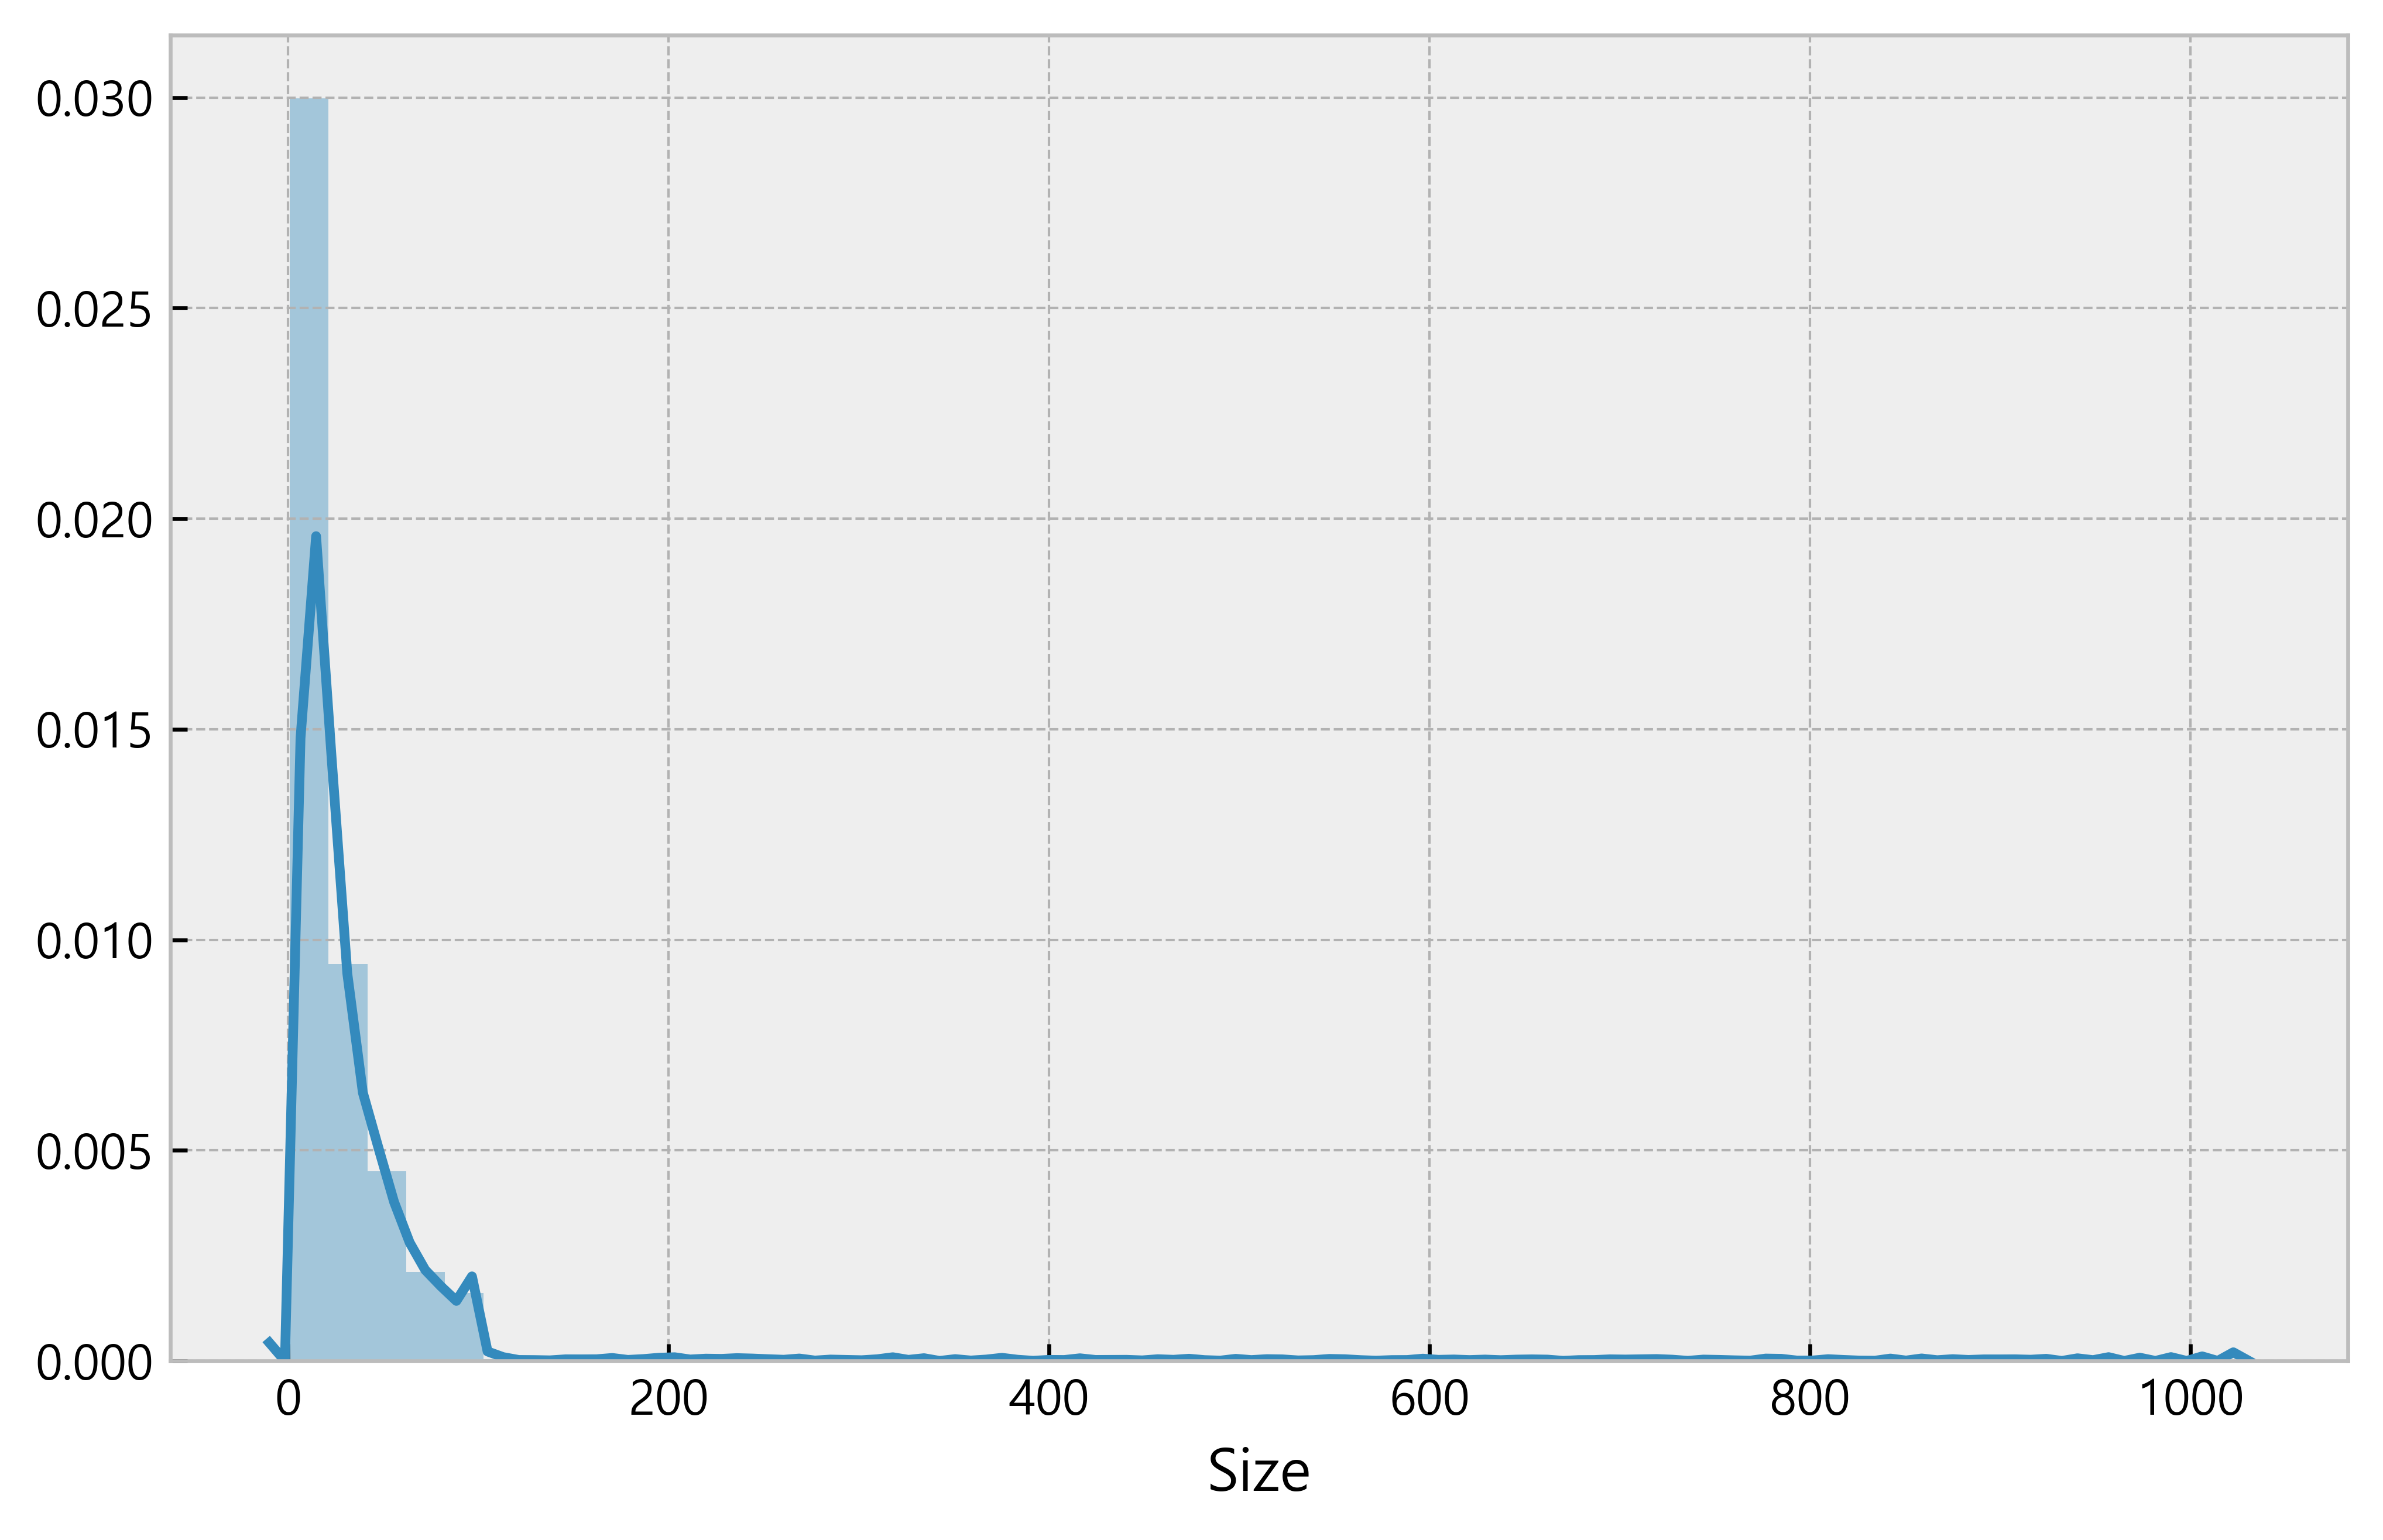

In [49]:
# 데이터 전처리 2차 - NaN값 채우기
# Size 데이터 분포도 확인
sns.distplot(df_7.Size)

In [50]:
# Size 중앙값 구하기
median_size = np.median(df_7.Size.dropna())
median_size

15.0

In [51]:
# Size 평균 구하기
average_size = round(np.average(df_7.Size.dropna()), 1)
average_size

37.0

In [52]:
# size data의 분포도 상, 중앙값보다는 평균이 더 가까운 것으로 확인
# 비어있는 데이터에 평균을 넣기로 결정
df_7["Size"][df_7["Size"].isnull()] = average_size

C:\Users\Gk\anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [53]:
# Size 데이터 전처리 완료 - checkpoint 생성
df_8 = df_7
df_8

Size    Installs  Type
0      19.0     10000.0   0.0
1      14.0    500000.0   0.0
2       8.7   5000000.0   0.0
3      25.0  50000000.0   0.0
4       2.8    100000.0   0.0
...     ...         ...   ...
10836  53.0      5000.0   0.0
10837   3.6       100.0   0.0
10838   9.5      1000.0   0.0
10839  37.0      1000.0   0.0
10840  19.0  10000000.0   0.0

[10841 rows x 3 columns]

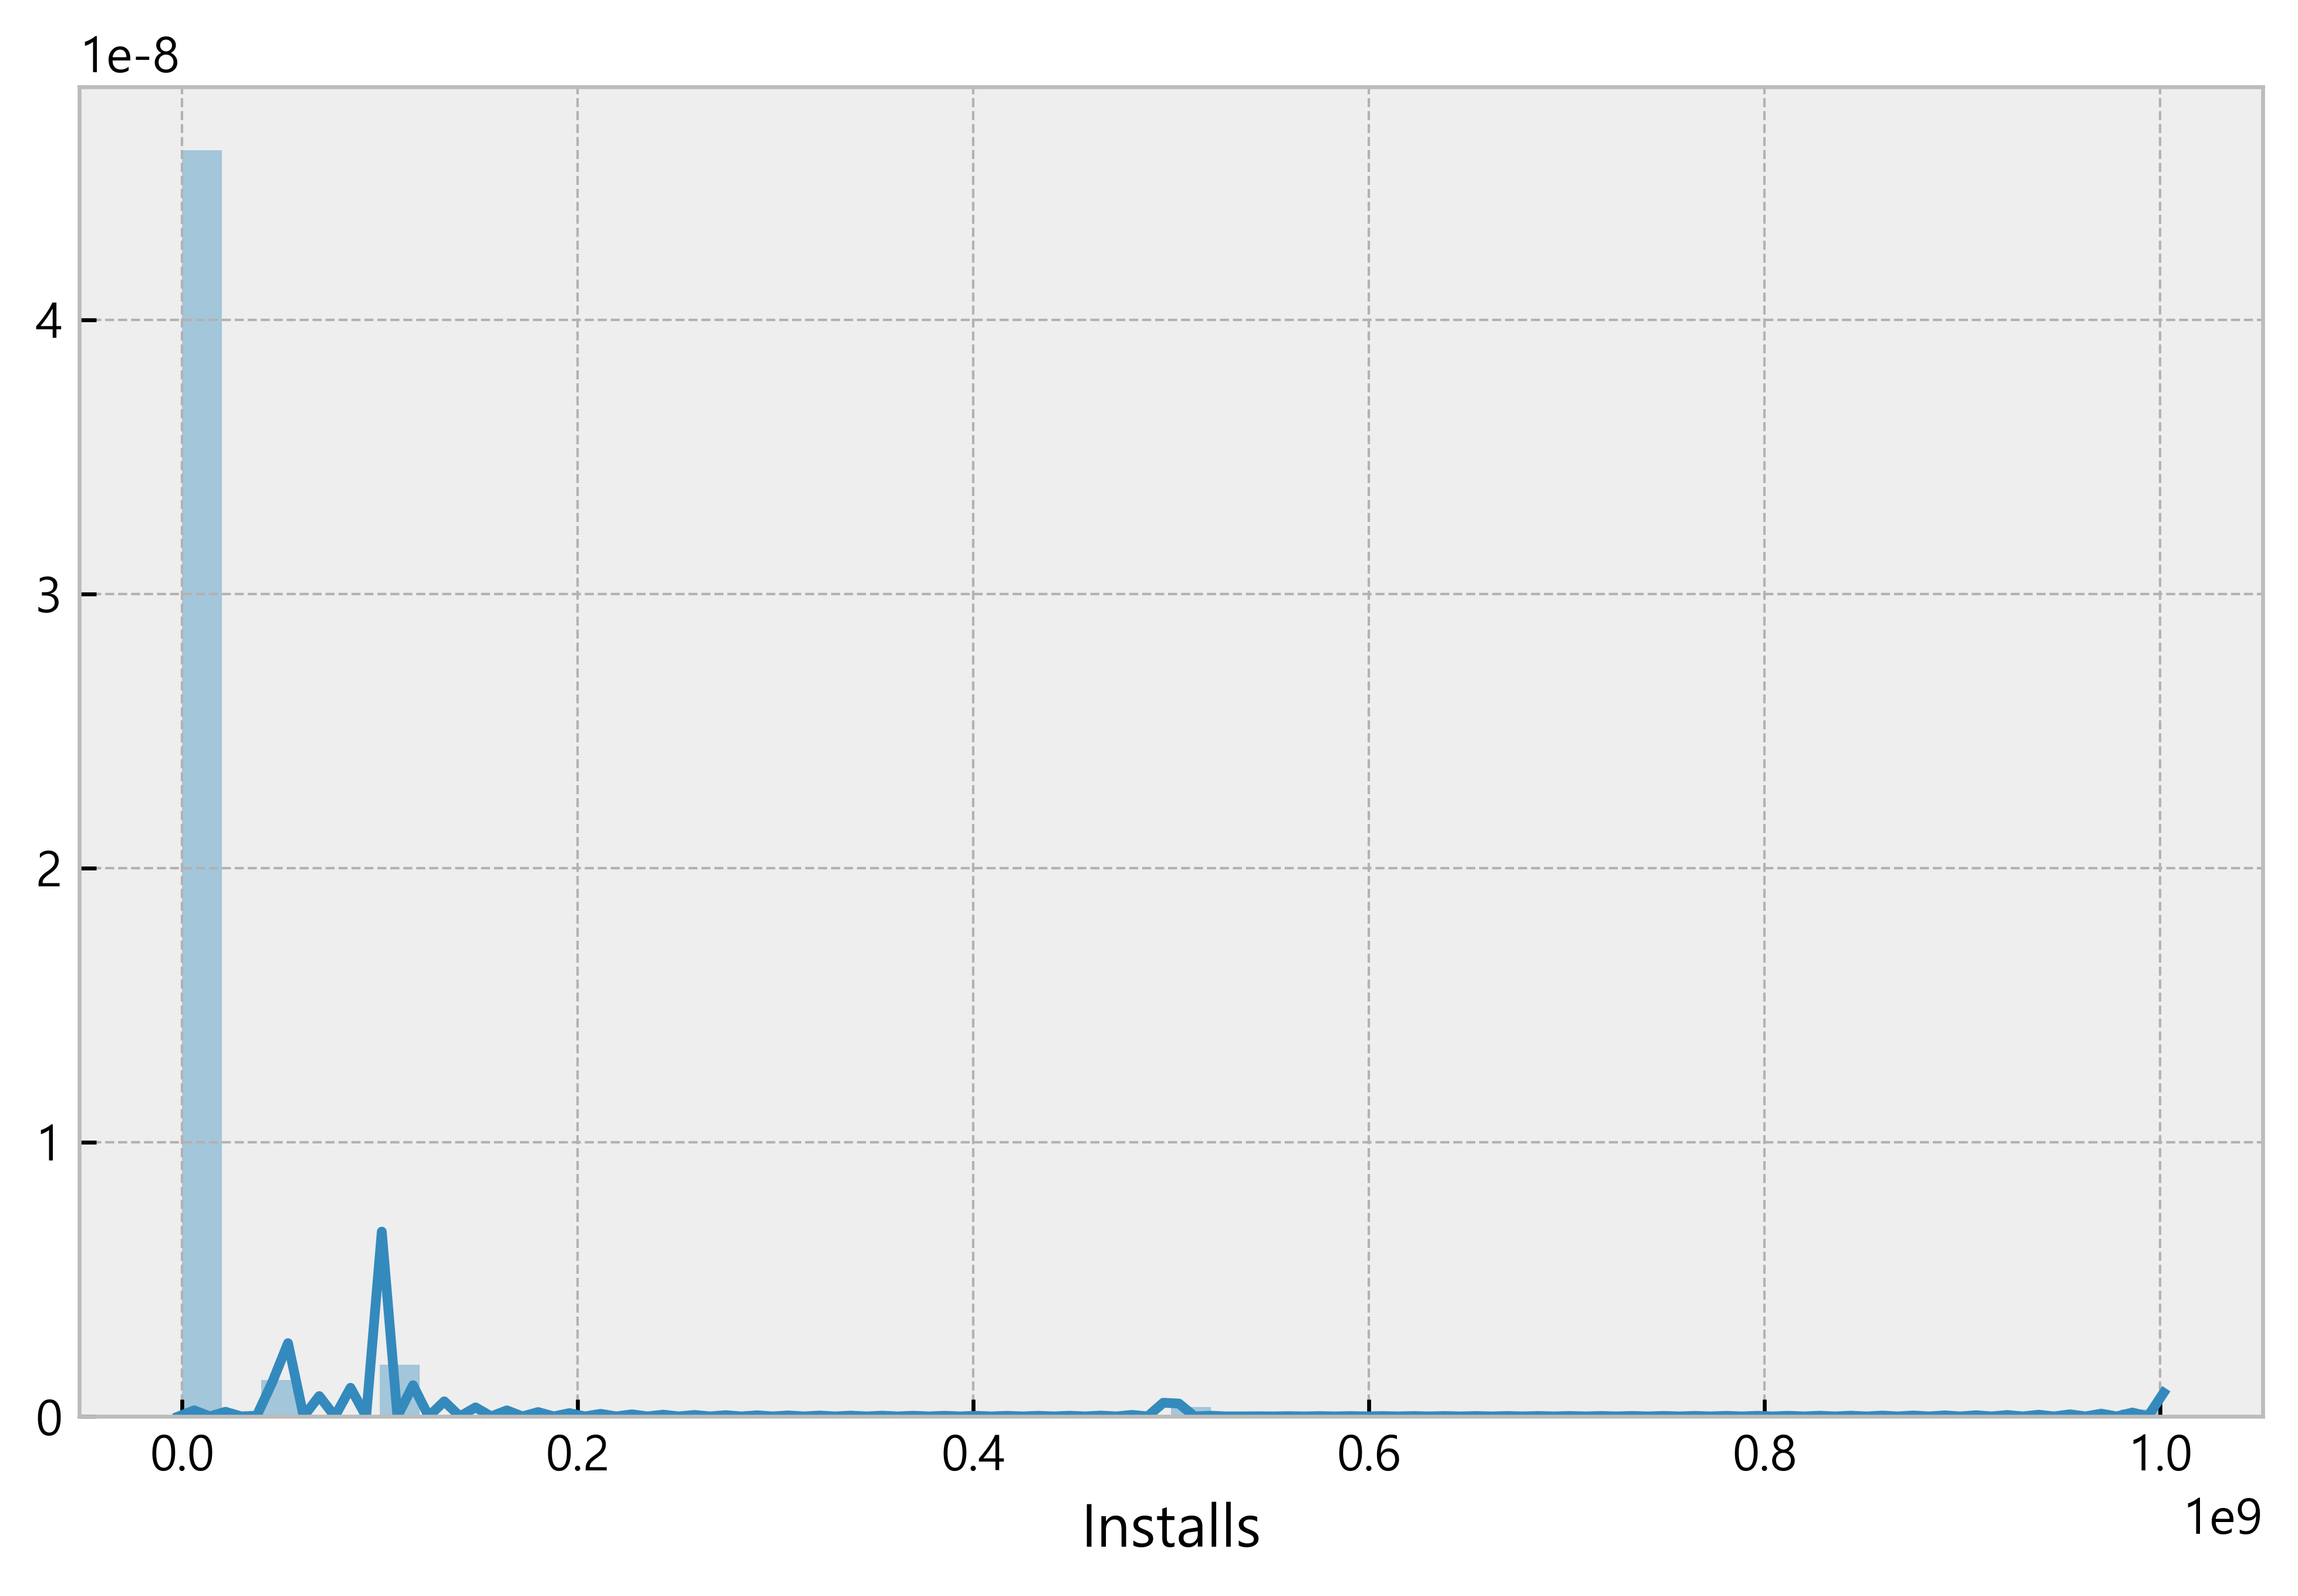

In [54]:
# Install data 분포도
sns.distplot(df_8.Installs)

In [55]:
# Installs 중앙값 구하기
median_installs = np.median(df_8.Installs.dropna())
median_installs

100000.0

In [56]:
# Size 평균 구하기
average_installs = round(np.average(df_8.Installs.dropna()), 1)
average_installs

15464339.0

In [57]:
#데이터가 굉장히 skewed이기 때문에 median으로 결정
df_8.Installs[9148] = median_installs

C:\Users\Gk\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [58]:
# Install 전처리 완료 - checkpoint 생성
df_9 = df_8
df_9

Size    Installs  Type
0      19.0     10000.0   0.0
1      14.0    500000.0   0.0
2       8.7   5000000.0   0.0
3      25.0  50000000.0   0.0
4       2.8    100000.0   0.0
...     ...         ...   ...
10836  53.0      5000.0   0.0
10837   3.6       100.0   0.0
10838   9.5      1000.0   0.0
10839  37.0      1000.0   0.0
10840  19.0  10000000.0   0.0

[10841 rows x 3 columns]

In [59]:
msno.matrix(df_9)

In [60]:
msno.bar(df_9)

In [102]:
df_final = df
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  float64
 6   Type            10841 non-null  float64
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


In [103]:
df_final['Size'] = df_9['Size']
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  float64
 6   Type            10841 non-null  float64
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


In [104]:
df_final['Installs'] = df_9['Installs']
df_final['Type'] = df_9['Type']
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  float64
 6   Type            10841 non-null  float64
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


In [105]:
msno.bar(df_final)

In [106]:
df_final.tail(1)

App   Category  Rating  \
10840  iHoroscope - 2018 Daily Horoscope & Astrology  LIFESTYLE     4.5   

      Reviews  Size    Installs  Type Price Content Rating     Genres  \
10840  398307  19.0  10000000.0   0.0     0       Everyone  Lifestyle   

        Last Updated         Current Ver         Android Ver  
10840  July 25, 2018  Varies with device  Varies with device

In [107]:
df_final2 = df_final
df_final2.tail(1)

App   Category  Rating  \
10840  iHoroscope - 2018 Daily Horoscope & Astrology  LIFESTYLE     4.5   

      Reviews  Size    Installs  Type Price Content Rating     Genres  \
10840  398307  19.0  10000000.0   0.0     0       Everyone  Lifestyle   

        Last Updated         Current Ver         Android Ver  
10840  July 25, 2018  Varies with device  Varies with device

In [108]:
# id column 추가
df_final2['id'] = df_final2.index
df_final2.tail(1)

App   Category  Rating  \
10840  iHoroscope - 2018 Daily Horoscope & Astrology  LIFESTYLE     4.5   

      Reviews  Size    Installs  Type Price Content Rating     Genres  \
10840  398307  19.0  10000000.0   0.0     0       Everyone  Lifestyle   

        Last Updated         Current Ver         Android Ver     id  
10840  July 25, 2018  Varies with device  Varies with device  10840

In [109]:
# id 첫번째 숫자 확인
df_final2.head(1)

App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   

  Reviews  Size  Installs  Type Price Content Rating        Genres  \
0     159  19.0   10000.0   0.0     0       Everyone  Art & Design   

      Last Updated Current Ver   Android Ver  id  
0  January 7, 2018       1.0.0  4.0.3 and up   0

In [110]:
# id column 삭제
del df_final2['id']

In [111]:
# 삭제할 row 내용확인
df_final2.iloc[[10472]]

App Category  Rating Reviews  Size  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   3.0   

       Installs  Type     Price Content Rating             Genres  \
10472    1000.0   0.0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [112]:
df_final2.iloc[[9148]]

App Category  Rating Reviews  Size  Installs  \
9148  Command & Conquer: Rivals   FAMILY     NaN       0  37.0  100000.0   

      Type Price Content Rating    Genres   Last Updated         Current Ver  \
9148   0.0     0   Everyone 10+  Strategy  June 28, 2018  Varies with device   

             Android Ver  
9148  Varies with device

In [113]:
# 10472, 9148 row 삭제
df_final3 = df_final2.drop([10472])
df_final3 = df_final3.drop([9148])

In [119]:
# row 삭제 확인
df_final3.iloc[[9147, 9148, 10470, 10471]]

App         Category  Rating  Reviews   Size  \
9147          Plants vs. Zombies™ 2           FAMILY     4.4   567632   15.0   
9149   Star Wars™: Galaxy of Heroes           FAMILY     4.5  1461698   67.0   
10471              Xposed Wi-Fi-Pwd  PERSONALIZATION     3.5     1042  404.0   
10473       osmino Wi-Fi: free WiFi            TOOLS     4.2   134203    4.1   

         Installs  Type Price Content Rating           Genres    Last Updated  \
9147   10000000.0   0.0     0   Everyone 10+           Casual   June 12, 2018   
9149   10000000.0   0.0     0   Everyone 10+     Role Playing    May 21, 2018   
10471    100000.0   0.0     0       Everyone  Personalization  August 5, 2014   
10473  10000000.0   0.0     0       Everyone            Tools  August 7, 2018   

       Current Ver   Android Ver  
9147         6.8.1    4.1 and up  
9149   0.12.334385    4.1 and up  
10471        3.0.0  4.0.3 and up  
10473      6.06.14    4.4 and up

In [123]:
col_f = ['Size', 'Installs', 'Type']
df_final3 = df_final3[col_f]
df_final3.tail(3)

Size    Installs  Type
10838   9.5      1000.0   0.0
10839  37.0      1000.0   0.0
10840  19.0  10000000.0   0.0

In [124]:
# csv로 저장
df_final3.to_csv('gps_S,I,T_preprocessed_data.csv', index=False)